# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Reza Syaifullah Narendra Putra]
- **Email:** [ejanarendra9@gmail.com]
- **ID Dicoding:** [rezanarendra]

# Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan antara jumlah peminjaman sepeda pada hari kerja dengan hari libur?
- Apakah terdapat hubungan antara tingkat kelembapan dengan jumlah peminjaman sepeda disetiap harinya dalam satu tahun dan bagaimana polanya?

# Import Semua Packages/Library yang Digunakan

***Import Library***

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pada tahap ini akan dilakukan import modul atau library yang digunakan dalam analisis data menggunakan Python. Numpy digunakan untuk melakukan operasi numerik, pandas digunakan untuk memanipulasi data dalam bentuk Data Frame, matplotlib.pyplot dan seaborn digunakan untuk melakukan visualisasi data.

# Data Wrangling

## Gathering Data

### **=== Memuat data tabel day ===**

Kode program di bawah akan menampilkan tabel data day (Jumlah peminjaman sepeda yang diagregasi per hari) yang dimuat dalam bentuk DataFrame, kemudian akan menampilkan 5 baris pertama dari day_df.

In [254]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **=== Memuat data tabel hour ===**

Kode program di bawah akan menampilkan tabel data hour (Jumlah peminjaman sepeda yang diagregasi per jam) yang dimuat dalam bentuk DataFrame, kemudian akan menampilkan 5 baris pertama dari hour_df.

In [255]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### **=== Menilai Data day_df ===**

> ***1. Checking Tipe Data & Missing Value***

Kode program di bawah akan memeriksa tipe data dan missing value dari tiap kolom yang terdapat dalam day_df.

In [256]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari data yang ditampilkan di atas menunjukkan bahwa tidak terdapat missing value pada setiap kolom namun terdapat tipe data yang tidak sesuai pada kolom "dteday" yang memiliki tipe data object, dimana seharusnya merupakan tipe data datetime yang menunjukkan tanggal.

> ***2. Checking Duplikasi Data***

Kode program di bawah akan memeriksa apakah terdapat duplikasi data atau tidak dalam day_df.

In [257]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Dari data yang ditampilkan di atas menunjukkan bahwa tidak terdapat duplikasi data pada day_df.

> ***3. Checking Ringkasan Parameter Statistik***

Kode program di bawah akan menampilkan ringkasan parameter statistik seperti mean, median, dll dari kolom numerik pada sebuah day_df.

In [258]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari ringkasan parameter statistik di atas tidak terdapat keanehan pada data, namun alangkah baiknya jika data yang ditertera dalam tabel langsung diberikan nilai asliya jadi bukanlah angka 1, 2, ... (Contoh kolom season dibuah menjadi 1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)

### **=== Menilai Data hour_df ===**

> ***1. Checking Tipe Data & Missing Value***

Kode program di bawah akan memeriksa tipe data dan missing value dari tiap kolom yang terdapat dalam hour_df.

In [259]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari data yang ditampilkan di atas menunjukkan bahwa tidak terdapat missing value pada setiap kolom namun terdapat tipe data yang tidak sesuai pada kolom "dteday" yang memiliki tipe data object, dimana seharusnya merupakan tipe data datetime yang menunjukkan tanggal.

> ***2. Checking Duplikasi Data***

Kode program di bawah akan memeriksa apakah terdapat duplikasi data atau tidak dalam hour_df.

In [260]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Dari data yang ditampilkan di atas menunjukkan bahwa tidak terdapat duplikasi data pada hour_df.

> ***3. Checking Ringkasan Parameter Statistik***

Kode program di bawah akan menampilkan ringkasan parameter statistik seperti mean, median, dll dari kolom numerik pada sebuah hour_df.

In [261]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari ringkasan parameter statistik di atas tidak terdapat keanehan pada data.

## Cleaning Data

### **=== Membersihkan Data day_df ===**

> ***1. Mengubah Isi Kolom Menjadi Nilai Asli***

Kode program di bawah akan mengubah nilai yang terdapat pada dataframe (day_df) sebelumnya dengan menggunakan fungsi replace sesuai data sesungguhnya.

In [262]:
day_df['season'] = day_df['season'].replace({1: 'musim semi', 2: 'musim panas', 3: 'musim gugur', 4: 'musim dingin'})
day_df['yr'] = day_df['yr'].replace({0: '2011', 1: '2012'})
day_df['mnth'] = day_df['mnth'].replace({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})
day_df['holiday'] = day_df['holiday'].replace({0: 'Tidak libur', 1: 'Libur'})
day_df['weekday'] = day_df['weekday'].replace({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
day_df['workingday'] = day_df['workingday'].replace({0: 'Tidak', 1: 'Ya'})
day_df['weathersit'] = day_df['weathersit'].replace({1: 'Cerah + Sedikit awan + Sebagian berawan + Sebagian berawan', 2: 'Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut', 3: 'Salju ringan, Hujan ringan + Petir + Awan berserakan, Hujan ringan + Awan berserakan', 4: 'Hujan deras + Pallet Es + Petir + Kabut, Salju + Kabut'})

print(day_df)

     instant      dteday      season    yr      mnth      holiday weekday  \
0          1  2011-01-01  musim semi  2011   Januari  Tidak libur   Sabtu   
1          2  2011-01-02  musim semi  2011   Januari  Tidak libur  Minggu   
2          3  2011-01-03  musim semi  2011   Januari  Tidak libur   Senin   
3          4  2011-01-04  musim semi  2011   Januari  Tidak libur  Selasa   
4          5  2011-01-05  musim semi  2011   Januari  Tidak libur    Rabu   
..       ...         ...         ...   ...       ...          ...     ...   
726      727  2012-12-27  musim semi  2012  Desember  Tidak libur   Kamis   
727      728  2012-12-28  musim semi  2012  Desember  Tidak libur   Jumat   
728      729  2012-12-29  musim semi  2012  Desember  Tidak libur   Sabtu   
729      730  2012-12-30  musim semi  2012  Desember  Tidak libur  Minggu   
730      731  2012-12-31  musim semi  2012  Desember  Tidak libur   Senin   

    workingday                                         weathersit      temp

> ***2. Mengubah Tipe Data***

Kode program di bawah akan mengganti tipe data pada kolom "dteday" day_df menjadi datetime.

In [263]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [264]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Data di atas menunjukkan bahwa tipe data pada kolom "dteday" day_df sudah berubah menjadi datetime, selain itu tipe data pada kolom yang diubah isi datanya menjadi nilai sesungguhnya juga berubah yang awalnya int64 menjadi object (String).

### **=== Membersihkan Data hour_df ===**

> ***1. Mengubah Isi Kolom Menjadi Nilai Asli***

Kode program di bawah akan mengubah nilai yang terdapat pada dataframe (hour_df) sebelumnya dengan menggunakan fungsi replace sesuai data sesungguhnya.

In [265]:
hour_df['season'] = hour_df['season'].replace({1: 'musim semi', 2: 'musim panas', 3: 'musim gugur', 4: 'musim dingin'})
hour_df['yr'] = hour_df['yr'].replace({0: '2011', 1: '2012'})
hour_df['mnth'] = hour_df['mnth'].replace({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})
hour_df['holiday'] = hour_df['holiday'].replace({0: 'Tidak libur', 1: 'Libur'})
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
hour_df['workingday'] = hour_df['workingday'].replace({0: 'Tidak', 1: 'Ya'})
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Cerah + Sedikit awan + Sebagian berawan + Sebagian berawan', 2: 'Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut', 3: 'Salju ringan, Hujan ringan + Petir + Awan berserakan, Hujan ringan + Awan berserakan', 4: 'Hujan deras + Pallet Es + Petir + Kabut, Salju + Kabut'})

print(hour_df)

       instant      dteday      season    yr      mnth  hr      holiday  \
0            1  2011-01-01  musim semi  2011   Januari   0  Tidak libur   
1            2  2011-01-01  musim semi  2011   Januari   1  Tidak libur   
2            3  2011-01-01  musim semi  2011   Januari   2  Tidak libur   
3            4  2011-01-01  musim semi  2011   Januari   3  Tidak libur   
4            5  2011-01-01  musim semi  2011   Januari   4  Tidak libur   
...        ...         ...         ...   ...       ...  ..          ...   
17374    17375  2012-12-31  musim semi  2012  Desember  19  Tidak libur   
17375    17376  2012-12-31  musim semi  2012  Desember  20  Tidak libur   
17376    17377  2012-12-31  musim semi  2012  Desember  21  Tidak libur   
17377    17378  2012-12-31  musim semi  2012  Desember  22  Tidak libur   
17378    17379  2012-12-31  musim semi  2012  Desember  23  Tidak libur   

      weekday workingday                                         weathersit  \
0       Sabtu      T

> ***2. Mengubah Tipe Data***

Kode program di bawah akan mengganti tipe data pada kolom "dteday" hour_df menjadi datetime.

In [266]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [267]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Data di atas menunjukkan bahwa tipe data pada kolom "dteday" hour_df sudah berubah menjadi datetime, selain itu tipe data pada kolom yang diubah isi datanya menjadi nilai sesungguhnya juga berubah yang awalnya int64 menjadi object (String).

# Exploratory Data Analysis (EDA)

## Merge DataFrame

Untuk melakukan explore data yang dapat mendukung untuk menjawab pertanyaan yang sudah dibuat sebelumnya maka dirasa perlu untuk melakukan merge pada ke dua buah dataframe (day_df & hour_df) menjadi satu dengan nama semua_df.

In [268]:
semua_data_df = pd.merge(day_df, hour_df, on='dteday', suffixes=('_day', '_hour'))
semua_data_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,musim semi,2011,Januari,Tidak libur,Sabtu,Tidak,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",0.344167,...,Sabtu,Tidak,Cerah + Sedikit awan + Sebagian berawan + Seba...,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,musim semi,2011,Januari,Tidak libur,Sabtu,Tidak,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",0.344167,...,Sabtu,Tidak,Cerah + Sedikit awan + Sebagian berawan + Seba...,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,musim semi,2011,Januari,Tidak libur,Sabtu,Tidak,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",0.344167,...,Sabtu,Tidak,Cerah + Sedikit awan + Sebagian berawan + Seba...,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,musim semi,2011,Januari,Tidak libur,Sabtu,Tidak,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",0.344167,...,Sabtu,Tidak,Cerah + Sedikit awan + Sebagian berawan + Seba...,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,musim semi,2011,Januari,Tidak libur,Sabtu,Tidak,"Kabut + Berawan, Kabut + Awan pecah, Kabut + S...",0.344167,...,Sabtu,Tidak,Cerah + Sedikit awan + Sebagian berawan + Seba...,0.24,0.2879,0.75,0.0,0,1,1


## Explore Data semua_data_df

Kode program di bawah akan menampilkan rangkuman parameter statistik dari dataframe semua_data_df.

In [269]:
semua_data_df.describe(include="all")

<ipython-input-269-95938f1ddfc8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  semua_data_df.describe(include="all")


,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379,17379,17379,17379,17379,17379,17379,17379,17379.000000,...,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,2,7,2,3,NaN,...,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,musim gugur,2012,Mei,Tidak libur,Sabtu,Ya,Cerah + Sedikit awan + Sebagian berawan + Seba...,NaN,...,Sabtu,Ya,Cerah + Sedikit awan + Sebagian berawan + Seba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,16879,2512,11865,11040,NaN,...,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,...,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182445,...,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,...,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,...,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Kode program di bawah akan menampilkan korelasi antar semua kolom yang terdapat dalam dataframe semua_data_df.

In [270]:
correlation = semua_data_df.corr()
print(correlation)

                 instant_day  temp_day  atemp_day   hum_day  windspeed_day  \
instant_day         1.000000  0.143615   0.145524  0.013874      -0.118285   
temp_day            0.143615  1.000000   0.991608  0.131257      -0.161577   
atemp_day           0.145524  0.991608   1.000000  0.144272      -0.187460   
hum_day             0.013874  0.131257   0.144272  1.000000      -0.258150   
windspeed_day      -0.118285 -0.161577  -0.187460 -0.258150       1.000000   
casual_day          0.274026  0.539726   0.540420 -0.071614      -0.165846   
registered_day      0.666666  0.536407   0.540841 -0.081968      -0.213500   
cnt_day             0.635172  0.625232   0.629054 -0.091657      -0.231340   
instant_hour        0.999995  0.143514   0.145394  0.013548      -0.118361   
hr                 -0.006161 -0.007823  -0.007840 -0.001111      -0.000113   
temp_hour           0.136074  0.947491   0.939540  0.124365      -0.153093   
atemp_hour          0.137543  0.937229   0.945161  0.136360     

<ipython-input-270-d9bfc128cf13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = semua_data_df.corr()


Kode program di bawah akan menampilkan rangkuman statistik yang terdapat disetiap tahun.

In [281]:
summary_stats = semua_data_df.groupby(by='yr_day')['cnt_hour'].agg(['sum', 'mean', 'median', 'std'])
summary_stats

,sum,mean,median,std
yr_day,,,,
2011,1243103,143.794448,109.0,133.797854
2012,2049576,234.666361,191.0,208.910941


Kode program di bawah akan menampilkan rangkuman statistik berdasarkan hari kerja dan hari libur

In [272]:
summary_stats = semua_data_df.groupby(by='workingday_day')['cnt_hour'].agg(['sum', 'mean', 'median', 'std'])
summary_stats

,sum,mean,median,std
workingday_day,,,,
Tidak,1000269,181.405332,119.0,172.853832
Ya,2292410,193.207754,151.0,185.107477


Kode program di bawah akan menampilkan rangkuman statistik berdasarkan kelembapan.

In [273]:
summary_stats = semua_data_df.groupby(by='hum_hour')['cnt_hour'].agg(['sum', 'mean', 'median', 'std'])
summary_stats

,sum,mean,median,std
hum_hour,,,,
0.00,623,28.318182,22.5,26.895541
0.08,77,77.000000,77.0,NaN
0.10,107,107.000000,107.0,NaN
0.12,29,29.000000,29.0,NaN
0.13,17,17.000000,17.0,NaN
...,...,...,...,...
0.93,21972,66.380665,36.0,92.859066
0.94,52601,93.930357,51.5,118.982600
0.96,375,125.000000,71.0,132.525469


# Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan antara jumlah peminjaman sepeda pada hari kerja dengan hari libur?

Kode program di bawah akan melakukan perhitungan jumlah peminjaman sepeda pada hari kerja dan hari libur.

In [274]:
peminjaman_pada_hari_kerja = semua_data_df[semua_data_df['workingday_day'] == 'Ya']['cnt_hour'].sum()
peminjaman_pada_hari_libur = semua_data_df[semua_data_df['workingday_day'] == 'Tidak']['cnt_hour'].sum()

print('Jumlah peminjaman sepeda pada hari kerja = ', peminjaman_pada_hari_kerja)
print('Jumlah peminjaman sepeda pada hari libur = ', peminjaman_pada_hari_libur)

Jumlah peminjaman sepeda pada hari kerja =  2292410
Jumlah peminjaman sepeda pada hari libur =  1000269


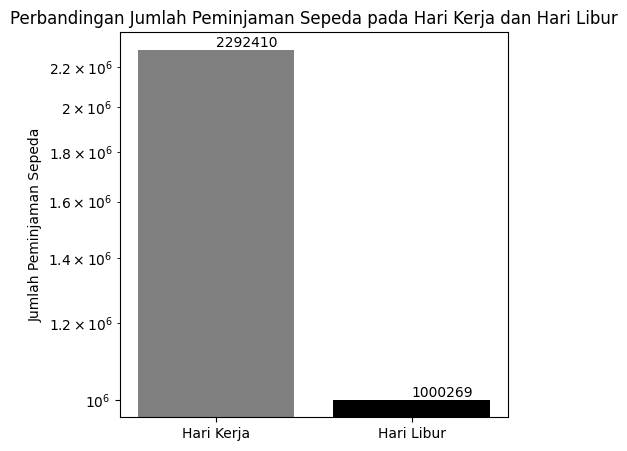

In [275]:
plt.figure(figsize=(5, 5))
bars = plt.bar(['Hari Kerja', 'Hari Libur'], [peminjaman_pada_hari_kerja, peminjaman_pada_hari_libur], color=['grey', 'black'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.yscale('log')
plt.title('Perbandingan Jumlah Peminjaman Sepeda pada Hari Kerja dan Hari Libur')
plt.ylabel('Jumlah Peminjaman Sepeda')

plt.show()

### Pertanyaan 2: Apakah terdapat hubungan antara tingkat kelembapan dengan jumlah peminjaman sepeda disetiap harinya dalam satu tahun dan bagaimana polanya?

Kode program di bawah akan melakukan analisis korelasi pada dataframe (semua_data_frame) antara kolom tingkat kelembapan (hum_hour) dengan jumlah peminjaman sepeda (cnt_hour)

In [276]:
korelasi = semua_data_df['hum_hour'].corr(semua_data_df['cnt_hour'])
print('Korelasi = ',korelasi)

Korelasi =  -0.3229107408245603


Dari nilai di atas menunjukkan bahwasannya nilai korelasi antara tingkat kelembapan dan jumlah peminjaman sepeda mendekati nilai -1 yang menunjukkan adanya hubungan keterbalikan, dimana ketika tingkat kelembapan meningkat, maka jumlah peminjaman sepeda cenderung menurun, begitupun sebaliknya.

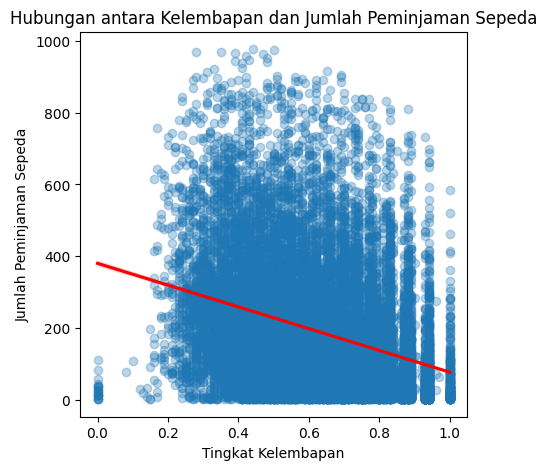

In [277]:
plt.figure(figsize=(5, 5))
sns.regplot(x='hum_hour', y='cnt_hour', data=semua_data_df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Hubungan antara Kelembapan dan Jumlah Peminjaman Sepeda')
plt.xlabel('Tingkat Kelembapan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# Conclusion

## - **Conclution pertanyaan 1**

Berdasarkan analisis yang sudah dilakukan, maka didapatkan jumlah peminjaman sepeda pada hari kerja lebih tinggi daripada peminjaman sepeda pada hari libur. Hal ini bisa saja diakibatkan karena beberapa kemungkinan seperti pada hari kerja, orang-orang lebih sering melakukan peminjaman sepeda untuk keperluan transportasi.

## - **Conclution pertanyaan 2**

Berdasarkan analisis yang sudah dilakukan, maka didapatkan adanya hubungan negatif antara tingkat kelembapan dengan jumlah peminjaman sepeda sebesar -0,32. Dari data tersebut dapat didapatkan sebuah pola ketika tingkat kelembapan semakin tinggi, maka jumlah peminjaman sepeda akan cenderung lebih rendah. Ketika tingkat kelembapan semakin rendah, maka jumlah peminjaman sepeda akan cenderung lebih tinggi. Lebih jelasnya perihal pola dapat dilihat pada hasil visualisasi data yang sudah dilakukan, dimana garis tren yang ada menunjukkan hasil yang berbanding terbalik.

In [278]:
semua_data_df.to_csv("semua_data_df.csv", index=False)